# Secret Messages in Images (Image Based Steganography)

### Imports

In [1]:
# imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
from PIL import Image
from PIL import ImageChops
from functools import reduce

### Steganography Helper Functions

In [2]:
#  Source: https://www.geeksforgeeks.org/image-based-steganography-using-python/
# Convert encoding data into 8-bit binary 
# form using ASCII value of characters 
def genData(data): 
    # list of binary codes 
    # of given data 
    newd = []  

    for i in data: 
        newd.append(format(ord(i), '08b')) 
    return newd

# Pixels are modified according to the 
# 8-bit binary data and finally returned 
def modPix(pix, data): 
      
    datalist = genData(data) 
    lendata = len(datalist) 
    imdata = iter(pix) 
  
    for i in range(lendata): 
          
        # Extracting 3 pixels at a time 
        pix = [value for value in imdata.__next__()[:3] +
                                  imdata.__next__()[:3] +
                                  imdata.__next__()[:3]] 

        # Pixel value should be made  
        # odd for 1 and even for 0 
        for j in range(0, 8): 
            if (datalist[i][j]=='0') and (pix[j]% 2 != 0): 

                if (pix[j]% 2 != 0): 
                    pix[j] -= 1

            elif (datalist[i][j] == '1') and (pix[j] % 2 == 0): 
                pix[j] -= 1
                  
        # Eigh^th pixel of every set tells  
        # whether to stop ot read further. 
        # 0 means keep reading; 1 means the 
        # message is over. 
        if (i == lendata - 1): 
            if (pix[-1] % 2 == 0): 
                pix[-1] -= 1
        else: 
            if (pix[-1] % 2 != 0): 
                pix[-1] -= 1

        pix = tuple(pix) 
        yield pix[0:3] 
        yield pix[3:6] 
        yield pix[6:9]
        
        
def encode_enc(newimg, data): 
    w = newimg.size[0] 
    (x, y) = (0, 0) 
      
    for pixel in modPix(newimg.getdata(), data): 

        # Putting modified pixels in the new image 
        newimg.putpixel((x, y), pixel) 
        if (x == w - 1): 
            x = 0
            y += 1
        else: 
            x += 1
            
            
# Encode data into image 
def encode(): 
    img = input("Enter image name(with extension): ") 
    image = Image.open(img, 'r') 

    data = input("Enter data to be encoded : ") 
    if (len(data) == 0): 
        raise ValueError('Data is empty') 

    newimg = image.copy() 
    encode_enc(newimg, data) 

    new_img_name = input("Enter the name of new image(with extension): ") 
    newimg.save(new_img_name, str(new_img_name.split(".")[1].upper()))


# Decode the data in the image 
def decode(): 
    img = input("Enter image name(with extension) :") 
    image = Image.open(img, 'r') 

    data = '' 
    imgdata = iter(image.getdata()) 

    while (True): 
        pixels = [value for value in imgdata.__next__()[:3] +
                                  imgdata.__next__()[:3] +
                                  imgdata.__next__()[:3]] 
        # string of binary data 
        binstr = '' 
          
        for i in pixels[:8]: 
            if (i % 2 == 0): 
                binstr += '0'
            else: 
                binstr += '1'
                  
        data += chr(int(binstr, 2)) 
        if (pixels[-1] % 2 != 0): 
            return data
        

# Steganography main function to encode/decode images        
def steg(): 
    a = int(input(":: Welcome to Steganography ::\n"
                        "1. Encode\n 2. Decode\n")) 
    if (a == 1): 
        encode() 
          
    elif (a == 2): 
        print("Decoded word- " + decode()) 
    else: 
        raise Exception("Enter correct input")

### Image Comparison Helper Functions

In [4]:
# create image of differences using pillow
def img_diff(im1, im2, path_to_save):
    "Visually shows the difference in 2 images by color subtraction"
    point_table = ([0] + ([255] * 255))
    diff = ImageChops.difference(im1, im2)
    diff = diff.convert('L')
    diff = diff.point(point_table)
    new = diff.convert('RGB')
    new.paste(im2, mask=diff)
    new.save(path_to_save)

In [5]:
# Source: http://effbot.org/zone/pil-comparing-images.htm
def equal(im1, im2):
    return ImageChops.difference(im1, im2).getbbox() is None


def rmsdiff(im1, im2):
    "Calculate the root-mean-square difference between two images"

    h = ImageChops.difference(im1, im2).histogram()

    # calculate rms
    return math.sqrt(reduce(operator.add, map(lambda h, i: h*(i**2), h, range(256)))
                     / (float(im1.size[0]) * im1.size[1]))

### Create Steganography Image

In [8]:
# Perform steganography on image
steg()

:: Welcome to Steganography ::
1. Encode
 2. Decode
1
Enter image name(with extension): images/original_panda.png
Enter data to be encoded : ThiS iS a SeCRet MesSAgE
Enter the name of new image(with extension): images/steg_panda.png


### Read in all images

In [9]:
original_panda = Image.open('Images/original_panda.png')
marked_panda = Image.open('Images/marked_panda.png')
steg_panda = Image.open('Images/steg_panda.png')

### Visualize images

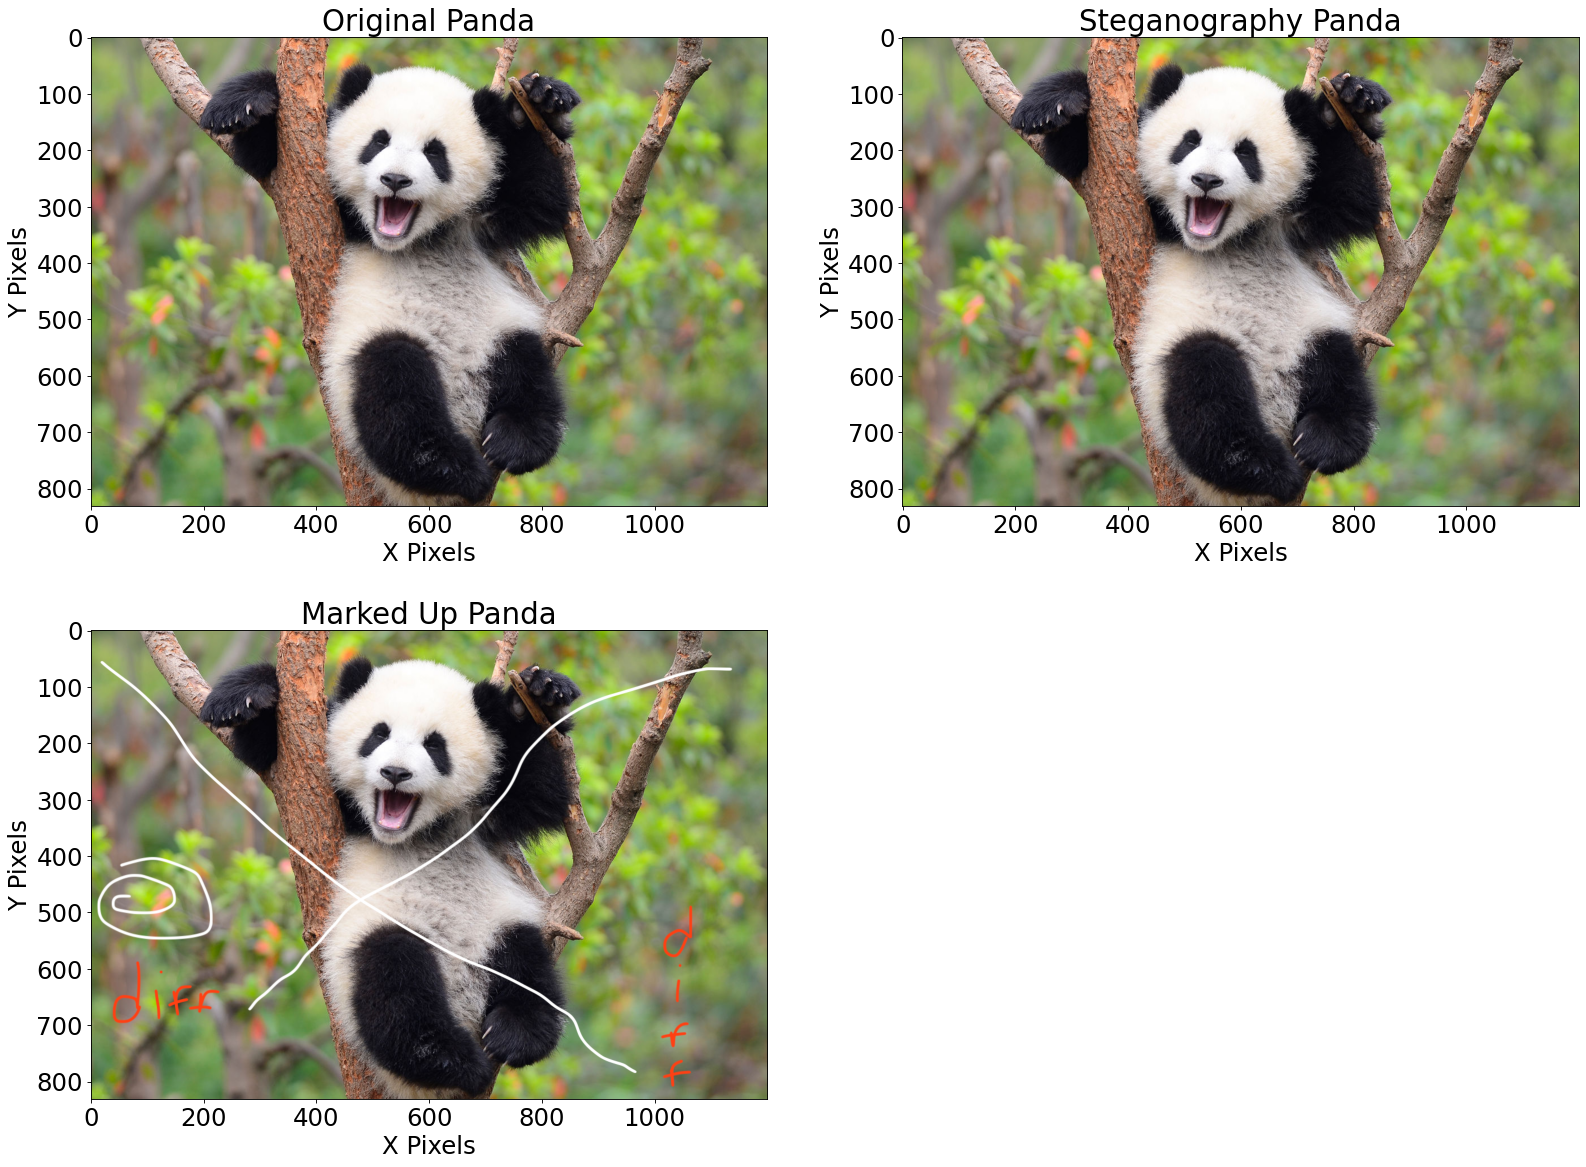

In [10]:
font = {'size'   : 22}
matplotlib.rc('font', **font)
f = plt.figure(num=None, figsize=(24, 18), dpi=80)
f.add_subplot(2,2, 1)
plt.title("Original Panda")
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.imshow(original_panda)
f.add_subplot(2,2, 2)
plt.title("Steganography Panda")
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.imshow(steg_panda)
f.add_subplot(2,2, 3)
plt.title("Marked Up Panda")
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.imshow(marked_panda)

### Differences in Original and Marked image

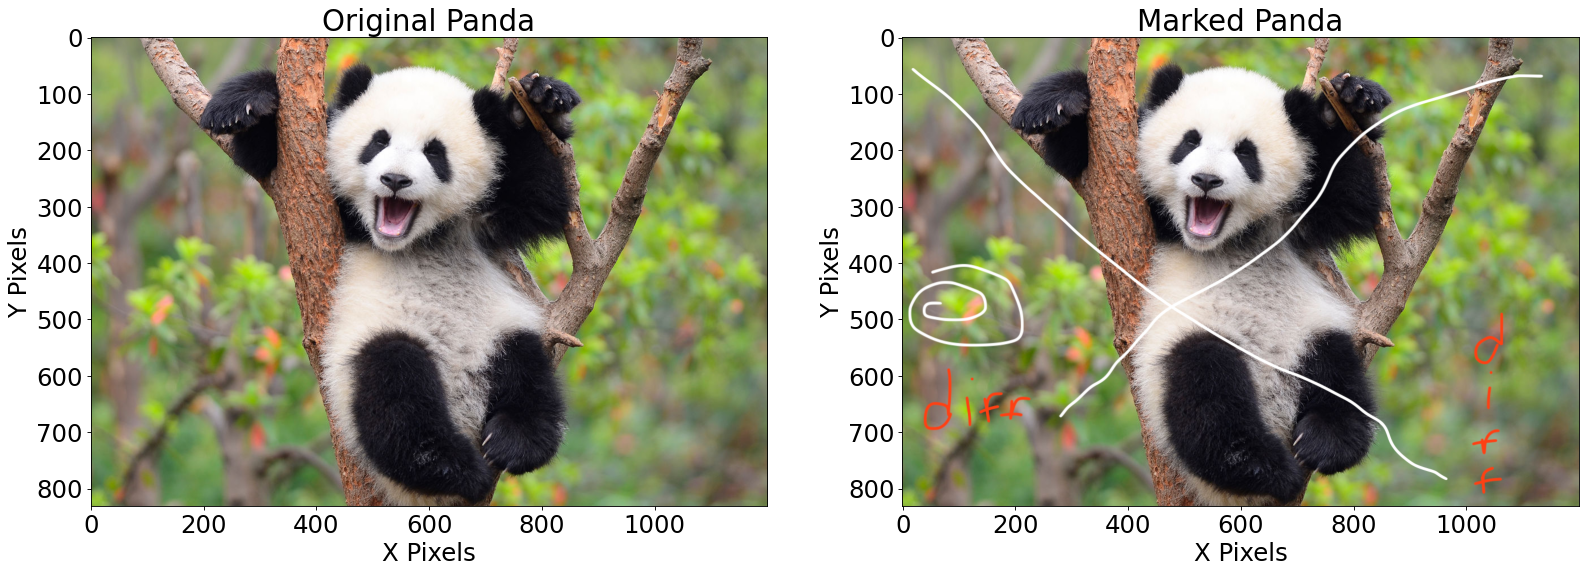

Original image ==  Marked image? True
Root-mean-square differences between images: 18.447262539101086


In [11]:
font = {'size'   : 22}
matplotlib.rc('font', **font)
f = plt.figure(num=None, figsize=(24, 18), dpi=80)
f.add_subplot(2,2, 1)
plt.title("Original Panda")
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.imshow(original_panda)
f.add_subplot(2,2, 2)
plt.title("Marked Panda")
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.imshow(marked_panda)
plt.show()

# Compare images
print('Original image ==  Marked image? {}'.format(equal(original_panda, marked_panda)))
print('Root-mean-square differences between images: {}'.format(rmsdiff(original_panda, marked_panda)))

### Visualize Difference

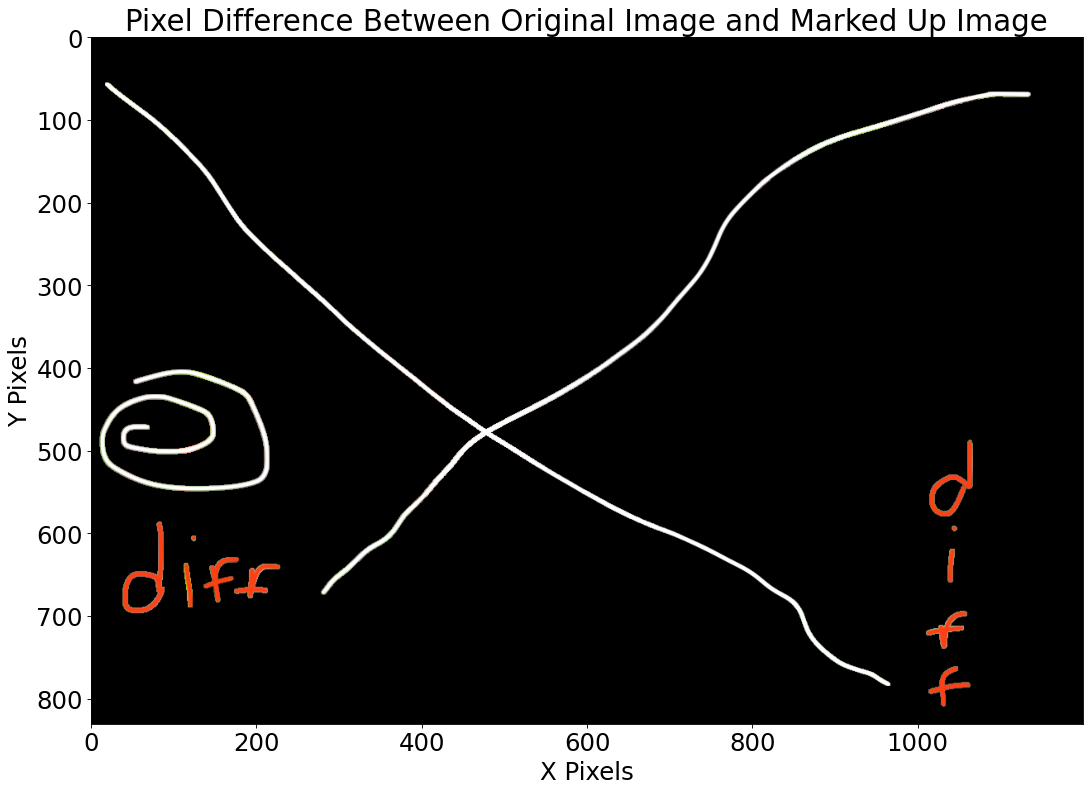

In [12]:
# create difference image
img_diff(original_panda, marked_panda, 'Images/diff_orig_marked.png')
# visualize
diff_orig_marked_img = Image.open('Images/diff_orig_marked.png')

f = plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.title('Pixel Difference Between Original Image and Marked Up Image')
plt.ylabel('Y Pixels')
plt.xlabel('X Pixels')
plt.imshow(diff_orig_marked_img)

### Differences in Original and Steganography image

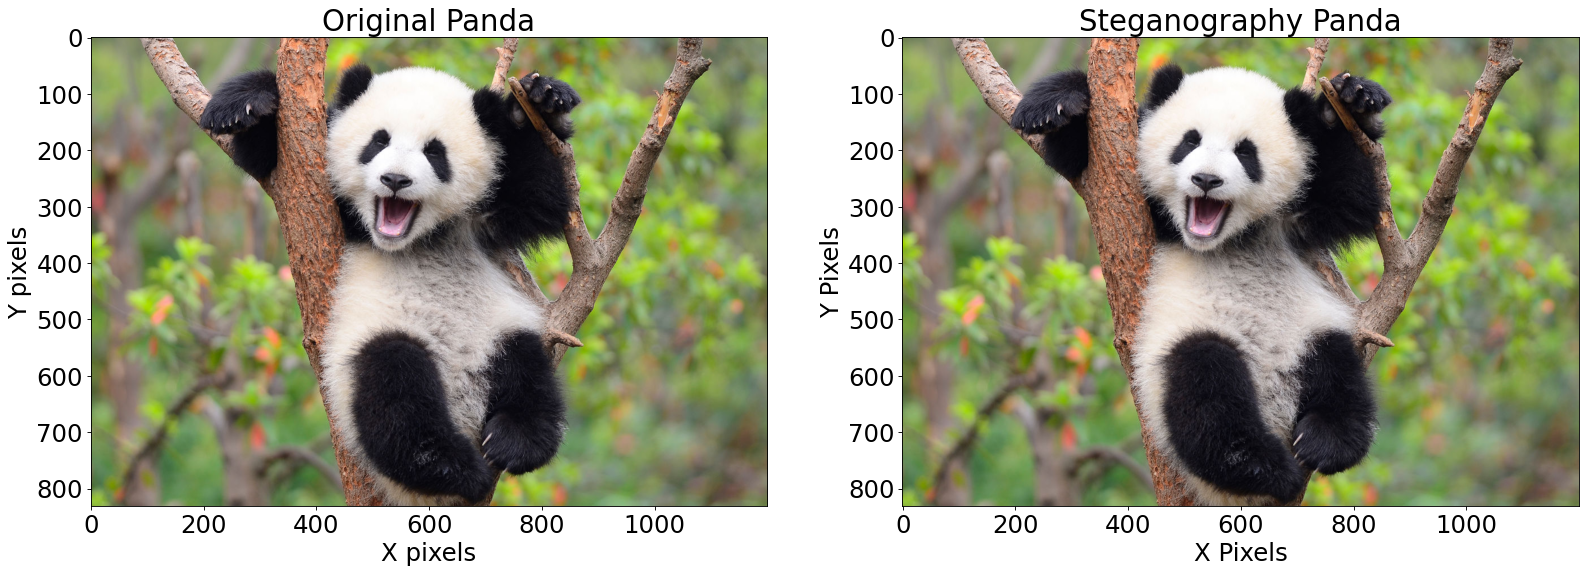

Original image ==  Steg image? True
Root-mean-square differences between images: 0.006642555677493421


In [13]:
font = {'size'   : 22}
matplotlib.rc('font', **font)
f = plt.figure(num=None, figsize=(24, 18), dpi=80)
f.add_subplot(2,2, 1)
plt.title("Original Panda")
plt.xlabel('X pixels')
plt.ylabel('Y pixels')
plt.imshow(original_panda)
f.add_subplot(2,2, 2)
plt.title("Steganography Panda")
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.imshow(steg_panda)
plt.show()

# Compare images
print('Original image ==  Steg image? {}'.format(equal(original_panda, steg_panda)))
print('Root-mean-square differences between images: {}'.format(rmsdiff(original_panda, steg_panda)))

### Visualize Difference

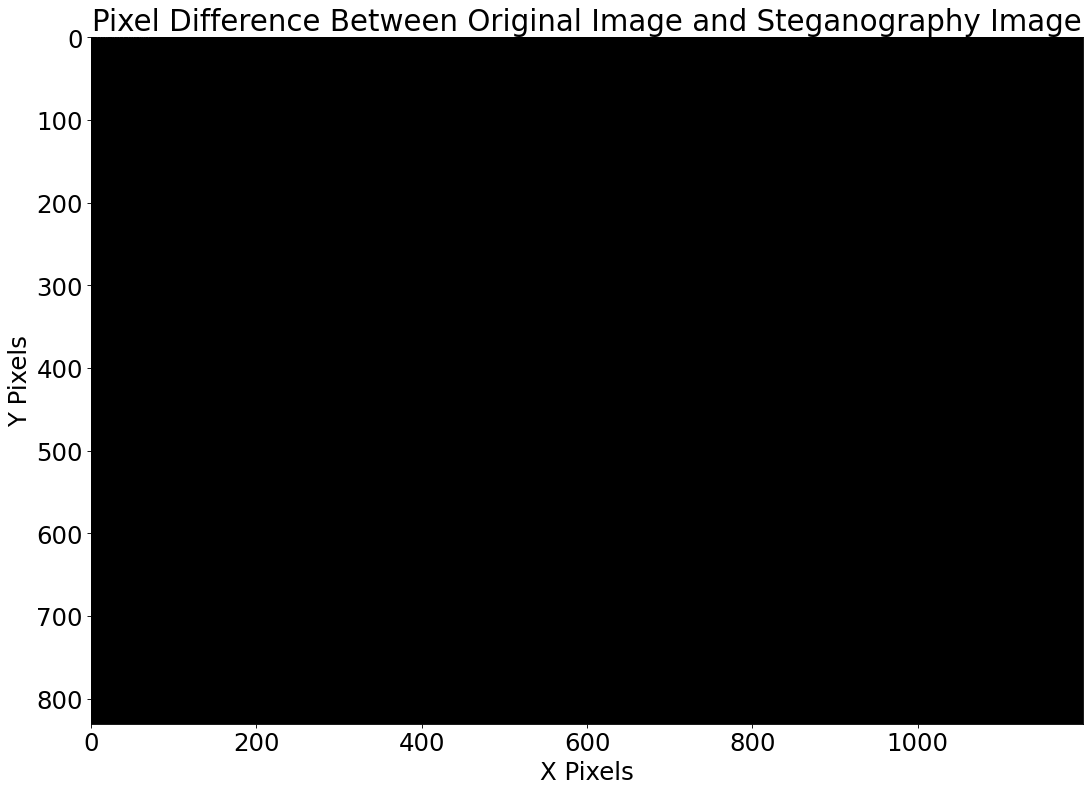

In [14]:
# create difference image
img_diff(original_panda, steg_panda, 'Images/diff_orig_steg.png')
# visualize
diff_orig_steg_img = Image.open('Images/diff_orig_steg.png')

f = plt.figure(num=None, figsize=(16, 12), dpi=80)
plt.title('Pixel Difference Between Original Image and Steganography Image')
plt.ylabel('Y Pixels')
plt.xlabel('X Pixels')
plt.imshow(diff_orig_steg_img.convert('1'))

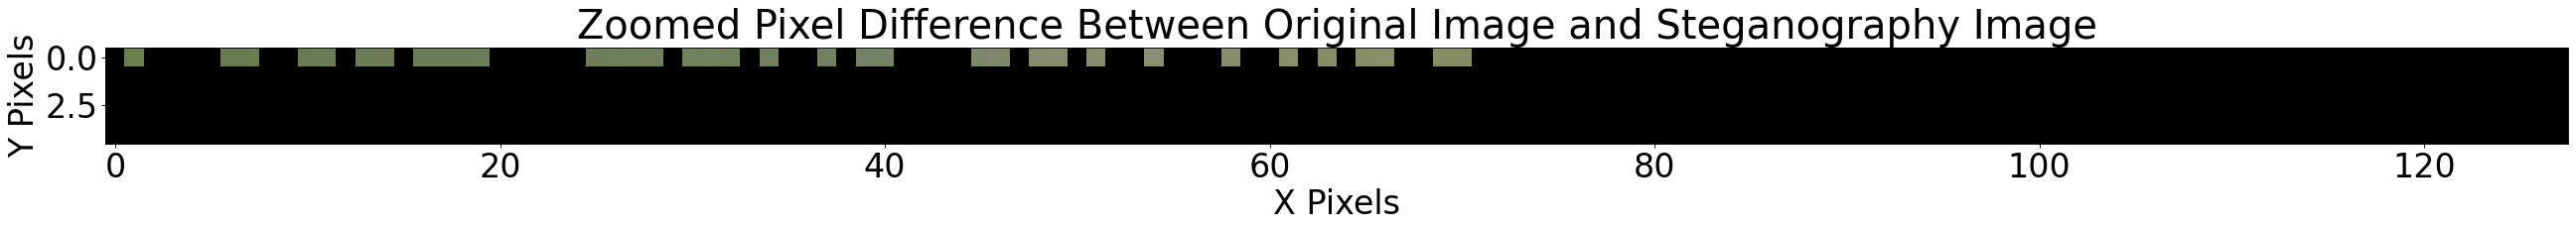

In [15]:
cropped_diff_steg = diff_orig_steg_img.crop((0, 0, 128, 5))
font = {'size'   : 30}
matplotlib.rc('font', **font)
f = plt.figure(num=None, figsize=(40, 30), dpi=80)
plt.title('Zoomed Pixel Difference Between Original Image and Steganography Image')
plt.ylabel('Y Pixels')
plt.xlabel('X Pixels')
plt.imshow(cropped_diff_steg)

### Decode Steganography Image

In [16]:
# call main steganography to decode
steg()

:: Welcome to Steganography ::
1. Encode
 2. Decode
2
Enter image name(with extension) :images/steg_panda.png
Decoded word- ThiS iS a SeCRet MesSAgE
